In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
tf.random.set_seed(3)

In [2]:
import cv2
from PIL import Image

In [3]:
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Dataset

In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

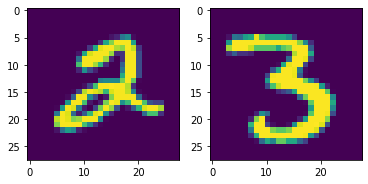

In [6]:
plt.subplot(1,2,1)
img = Image.fromarray(X_train[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_train[12])
plt.imshow(img)

Setting up the Layers of NN

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(60,activation='tanh'),
    keras.layers.Dense(10,activation='softmax')
                        ])

In [8]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
            )

In [9]:
history = model.fit(X_train,Y_train,validation_split=0.25,epochs=30)

Epoch 1/30
1407/1407 [==============================] - 18s 11ms/step - loss: 0.8299 - accuracy: 0.7373 - val_loss: 0.4880 - val_accuracy: 0.8495
Epoch 2/30
1407/1407 [==============================] - 11s 8ms/step - loss: 0.4485 - accuracy: 0.8648 - val_loss: 0.4045 - val_accuracy: 0.8803
Epoch 3/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3975 - accuracy: 0.8809 - val_loss: 0.3664 - val_accuracy: 0.8919
Epoch 4/30
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3686 - accuracy: 0.8889 - val_loss: 0.3422 - val_accuracy: 0.8991
Epoch 5/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3285 - accuracy: 0.9014 - val_loss: 0.3005 - val_accuracy: 0.9112
Epoch 6/30
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3379 - accuracy: 0.8984 - val_loss: 0.3196 - val_accuracy: 0.9045
Epoch 7/30
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3193 - accuracy: 0.9042 - val_loss: 0.3594 - val_acc

In [10]:
loss,metrics = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2286 - accuracy: 0.9374


1 9


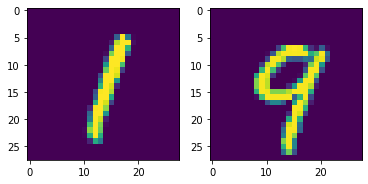

In [11]:
plt.subplot(1,2,1)
img = Image.fromarray(X_test[5])
plt.imshow(img)
plt.subplot(1,2,2)
img = Image.fromarray(X_test[12])
plt.imshow(img)
print(Y_test[5],Y_test[12])

In [12]:
test_pred = model.predict(X_test)

In [13]:
Y_arg_max_list = [np.argmax(i) for i in test_pred]

In [14]:
Y_arg_max_list[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test,Y_arg_max_list)
print(cnf_matrix)

[[ 946    0    0    0    2    4   22    2    3    1]
 [   0 1116    3    1    0    1    5    3    6    0]
 [  12    4  959   13    7    2   14    6   14    1]
 [   4    0   16  929    2   22    4   10   18    5]
 [   0    5    7    0  904    1   16    2    7   40]
 [   6    2    2   22    1  827   18    0    8    6]
 [  10    2    3    0    5    9  926    0    3    0]
 [   0    7   18    5    5    1    1  954    6   31]
 [  18    3    7   17    6   18   12    4  881    8]
 [   6    7    1   10   18    8    2   12   13  932]]


Text(0.5, 69.0, 'Predicted Labels')

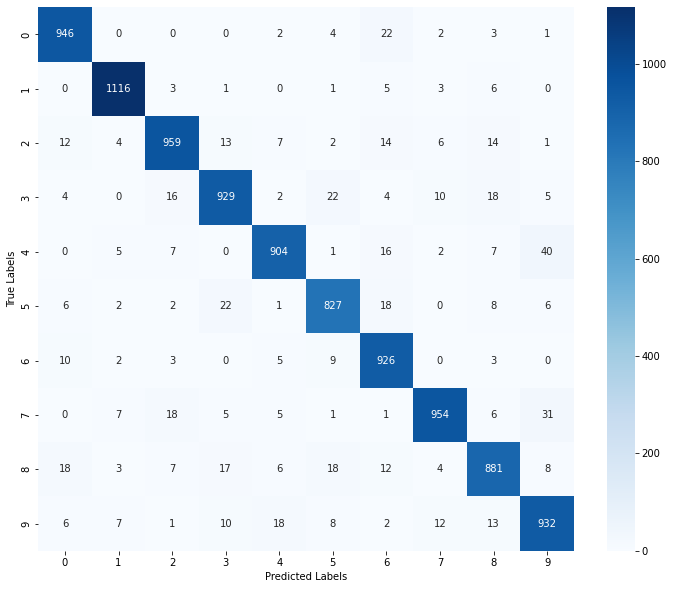

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(cnf_matrix,annot=True,cmap ='Blues',fmt='d')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [17]:
import cv2

3

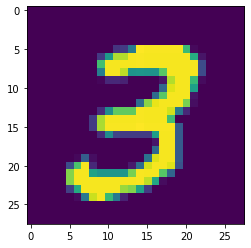

In [18]:
test_img = cv2.imread(r'MNIST_digit.png')
test_img = cv2.cvtColor(test_img,cv2.COLOR_RGB2GRAY)
test_img = cv2.resize(test_img,(28,28))
plt.imshow(test_img)
scaled_img = test_img/255
img_reshape = np.reshape(scaled_img,[1,28,28])
input_pred = model.predict(img_reshape)
np.argmax(input_pred)